# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Importing numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Importing visualization libraries **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Reading in the csv file **

In [4]:
df=pd.read_csv('911.csv')

** Checking the info() of the df **

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Analysing Data

** The top 5 zipcodes for 911 calls **

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** The top 5 townships for 911 calls **

In [16]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Unique title codes **

In [6]:
df['title'].nunique()

110

## Creating new features

** Extracting Reason/ Department code from title column into a new column** 

In [7]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

** The most common Reason for 911 call **

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** A countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

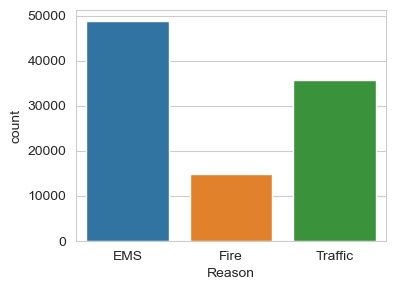

In [9]:
plt.figure(figsize=(4,3))
sns.set_style('whitegrid')
sns.despine()
sns.countplot(x='Reason',data= df)

___
** Now let us Change the datatype of timestamp from object to datatime**

In [10]:
df['timeStamp']=pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

** Adding three new columns called Hour, Month, Day_of_week **

In [20]:
df['Day_of_week']=df['timeStamp'].apply(lambda timestamp : timestamp.day_of_week )
df['Hour']=df['timeStamp'].apply(lambda x : x.hour)
df['Month']=df['timeStamp'].apply(lambda y: y.month)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df.replace({"Day_of_week": dmap},inplace=True)

** A countplot of the Day of Week column **

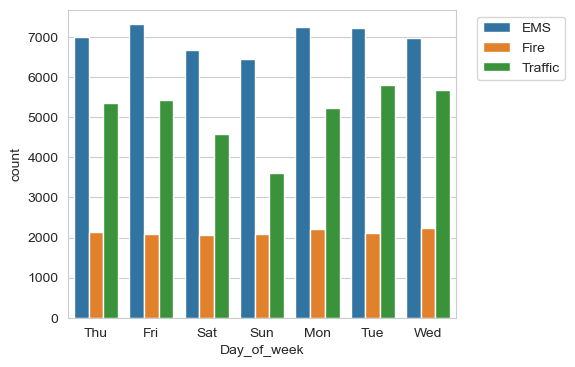

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(x='Day_of_week', data= df, hue='Reason')
plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper right')

** Countplot for Month column **

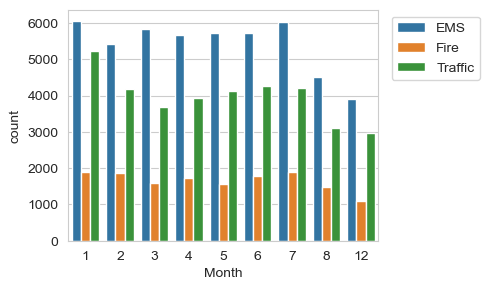

In [36]:
plt.figure(figsize=(4,3))
sns.countplot(x='Month', data= df, hue='Reason')
plt.legend(bbox_to_anchor=(1.35, 1.0), loc='upper right')

** We notice that the countplot was missing some Months, let's plot the information in another way, a simple line plot that fills in the missing months **

** Creating a gropuby object called byMonth, where we group the DataFrame by the month column. **

In [41]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Creating a plot off of the dataframe indicating the count of calls per month. **

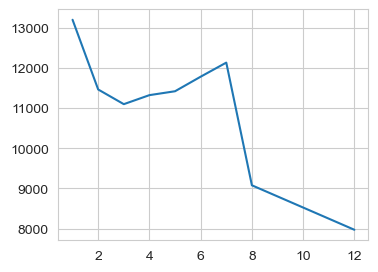

In [44]:
plt.figure(figsize=(4,3))
plt.plot(byMonth['lat'])

** Using seaborn's lmplot() to create a linear fit on the number of calls per month. **

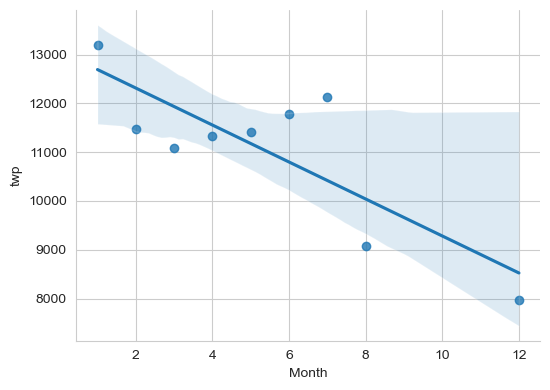

In [121]:
sns.lmplot(x='Month', y='twp',data = byMonth.reset_index(), aspect= 1.4, height=4)

** Creatinng a new column called 'Date' that contains the date from the timeStamp column. ** 

In [70]:
df['Date']=df['timeStamp'].apply(lambda date : date.date())

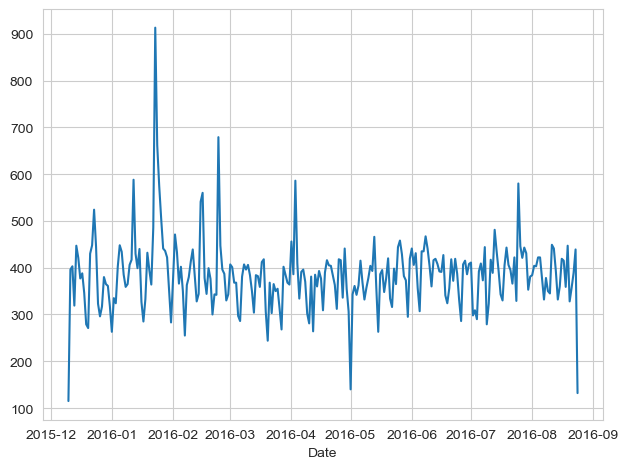

In [89]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

** Recreating the above plot but with 3 separate Reason for the 911 call**

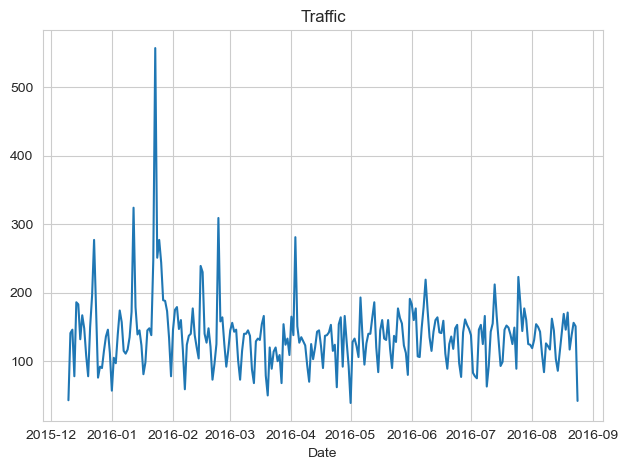

In [98]:
df[df['Reason']== 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

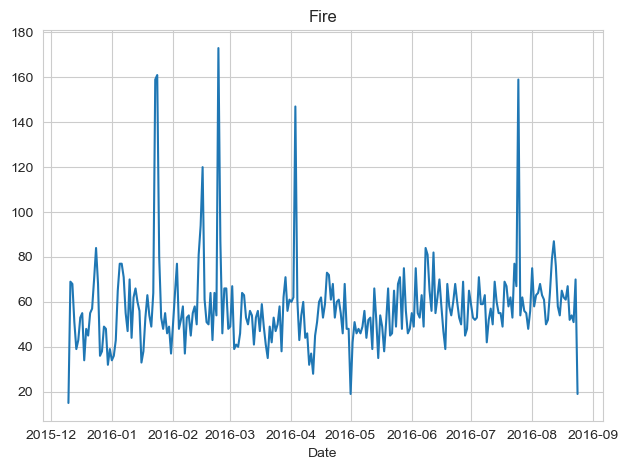

In [99]:
df[df['Reason']== 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

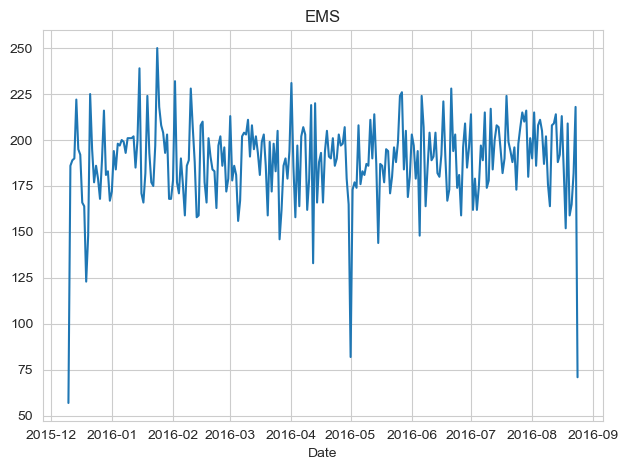

In [100]:
df[df['Reason']== 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Let's create a heatmaps with seaborn and our data. First we need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [106]:
value_count= df.groupby(by=['Day_of_week','Hour']).count()
pivot_table=value_count.pivot_table(index='Day_of_week', columns='Hour', values='lat')
pivot_table.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now the HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day_of_week'>

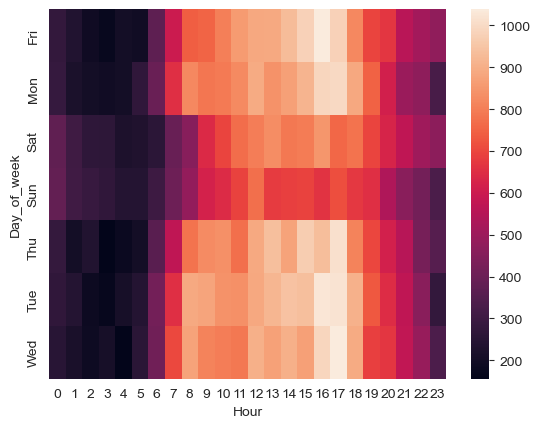

In [107]:
sns.heatmap(pivot_table)

** Creating a clustermap using this DataFrame. **

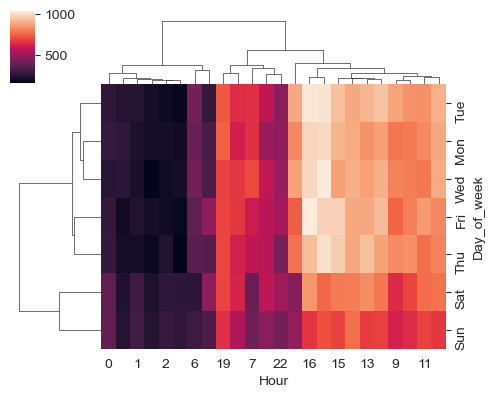

In [120]:
sns.clustermap(pivot_table, figsize=(5,4))

** Repeating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [112]:
val_count= df.groupby(by=['Day_of_week','Month']).count()
pivot_table2=val_count.pivot_table(index='Day_of_week', columns='Month', values='lat')
pivot_table2.head()

Month,1,2,3,4,5,6,7,8,12
Day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day_of_week'>

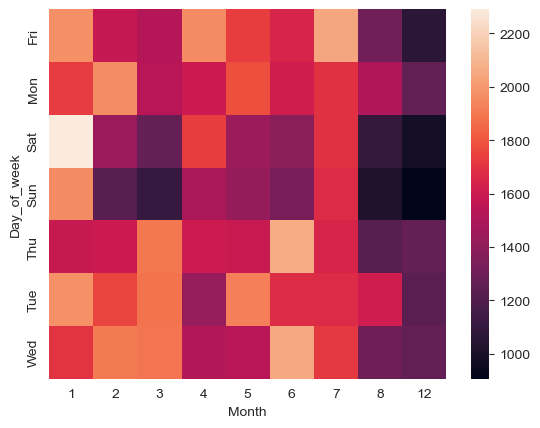

In [113]:
sns.heatmap(pivot_table2)

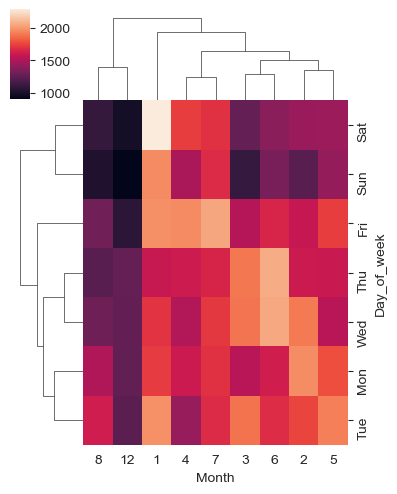

In [116]:
sns.clustermap(pivot_table2, figsize=(4,5))

 ## Thank you